# Analisi Dataset

Dopo aver campionato il dataset originale, si passa ad un'analisi esplorativa dei dati a disposizione.

## Importazione del dataset

In [1]:
#importo le librerie necessarie
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as IPD
import wave

In [ ]:
# con le successive 3 righe di codice andiamo ad scaricare il training set
!wget --no-check-certificate 'https://cdn.discordapp.com/attachments/1209871752134529066/1249007689183268864/reduced_dataset.zip?ex=6665bc8e&is=66646b0e&hm=7d2b0647a05dfc112d074125b09dba6e343e71d1487af7b679ea0b8dd57d65a8&' -O ../reduced_dataset.zip
!unzip ../reduced_dataset.zip
!mv reduced_dataset ..

## Analisi statistica

L'analisi visuale e statistica del dataset parte con un passaggio fondamentale per comprendere appieno i dati in esame: la visualizzazione del **nome** e il **numero** di classi a disposizione. Successivamente viene creato un grafico che mostra graficamente la distribuzione di ciascuna etichetta.

In [2]:
train_ds = tf.keras.utils.audio_dataset_from_directory(directory='../reduced_dataset/dataset/audio')

print('\nNumero classi:', len(train_ds.class_names))
print('Classi:', train_ds.class_names)

Found 12933 files belonging to 30 classes.

Numero classi: 30
Classi: ['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'wow', 'yes', 'zero']


In [3]:
label_counter = dict() # creiamo dizionario per tenere traccia della quantità di file per ogni label

# contiamo il numero di file per ogni label
for audio, labels in train_ds:
    for label in labels:
        label_name = train_ds.class_names[label.numpy()] # label è un int, perciò devo ricavarmi il nome

        # essendo il dizionario vuoto, darebbe errore se provassi ad accedere a una key inesistente
        if label_name not in label_counter.keys():
            label_counter[label_name] = 1
        else:
            label_counter[label_name] += 1

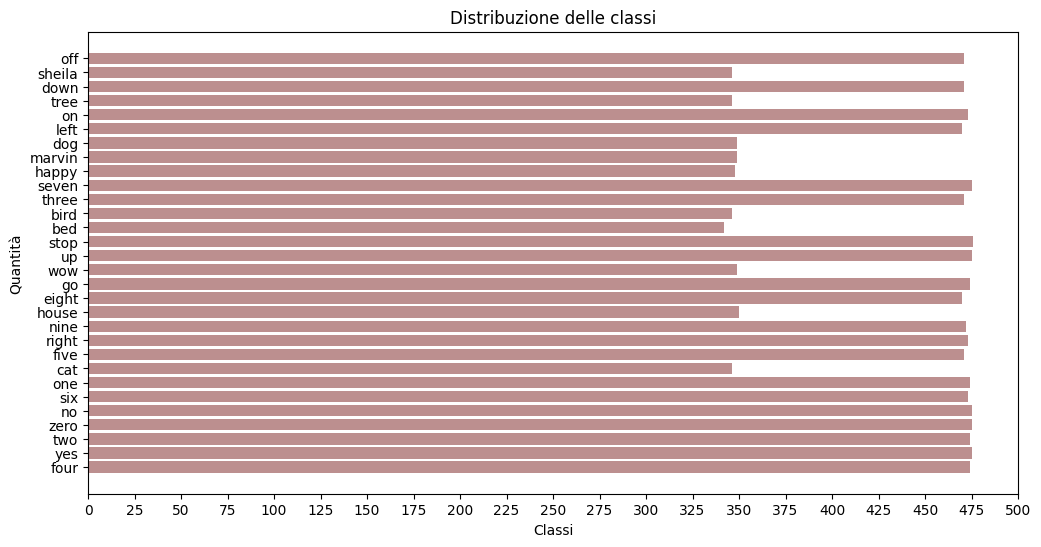

In [4]:
# mostriamo la distribuzione delle classi
plt.figure(figsize=(12, 6))
plt.barh(label_counter.keys(), label_counter.values(), color='rosybrown')
plt.xlabel('Classi')
plt.ylabel('Quantità')
plt.title('Distribuzione delle classi')
plt.xticks(np.arange(0, 525, 25))
plt.show()

Si può notare un leggero sbilanciamento nel dataset. Alcune etichette hanno più del 35% di dati in più rispetto alle meno rappresentate. 

## Riproduzione di un audio

`IPython.display` è una libreria utilizzata per mostrare diversi tipi di file: immagini, audio, video, file html, ...

Nel seguente caso verrà usata per riprodurre un audio scelto casualmente.

In [5]:
#proviamo ad ascoltare un audio e capiamo come farlo sopratutto
path_audio = '../reduced_dataset/dataset/audio/wow/0bde966a_nohash_1.wav'
audio = IPD.Audio(path_audio, autoplay=False)
display(audio)

Mostrando graficamente l'audio appena ascoltato si può notare l'ampiezza dell'audio e di conseguenza i rispettivi minimi e massimi, che nello specifico corrispondono a **31857** e **-28770**.

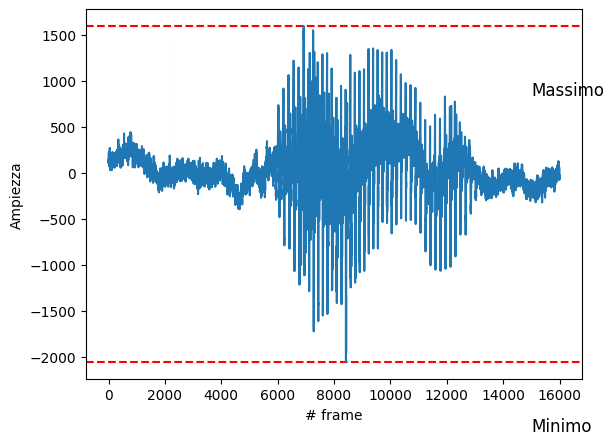

In [6]:
# leggiamo l'audio dalla path sopra indicata
audio = wave.open(path_audio, "r").readframes(-1)
audio = np.frombuffer(audio, dtype=np.int16)

# disegniamo le linee del massimo e del minimo, con i rispettivi flag
plt.axhline(y=max(audio), c='r', linestyle='--')
plt.axhline(y=min(audio), c='r', linestyle='--')
plt.text(15000, max(audio) - 750, 'Massimo', fontsize=12)
plt.text(15000, min(audio) - 750, 'Minimo', fontsize=12)

# infine mostriamo il plot
plt.ylabel('Ampiezza')
plt.xlabel('# frame')
plt.plot(audio)
plt.show()

## Funzioni utilizzate

Per questo task ci servirà la funzione `take_audios()` che si occcupa di ottenere un audio per ogni classe presente. La funzione restituisce un dizionario contenente come **chiave** il nome della classe e come valore **l'audio corrispondente**.

In [7]:
def take_audios():
    audio_to_show = dict() # creo il dizionario che conterrà gli audio

    # itero i batch del training set
    for audios, labels in train_ds:
        # itero all'interno del batch 
        for index, label in enumerate(labels):
            # questo controllo serve per evitare cicli inutili
            # quindi si blocca quando ha preso un audio per ogni classe
            if len(audio_to_show) == 30:
                return audio_to_show

            # mi salvo il nome della classe
            label_name = train_ds.class_names[label.numpy()]

            # se la label non è presente nel dizionario allora aggiungo l'audio
            if label_name not in audio_to_show.keys():
                audio_to_show[label_name] = audios[index]

    return audio_to_show

In [8]:
# quindi ci ricaviamo gli audio da mostrare nel plot
audios = take_audios()

Con il dizionario appena creato possiamo procedere alla rappresentazione di tutte le classi su un grafico **3 x 10** utilizzando la libreria `matplotlib`. Questa panoramica generale già evidenzia significative variazioni di forma per ciascuna classe.

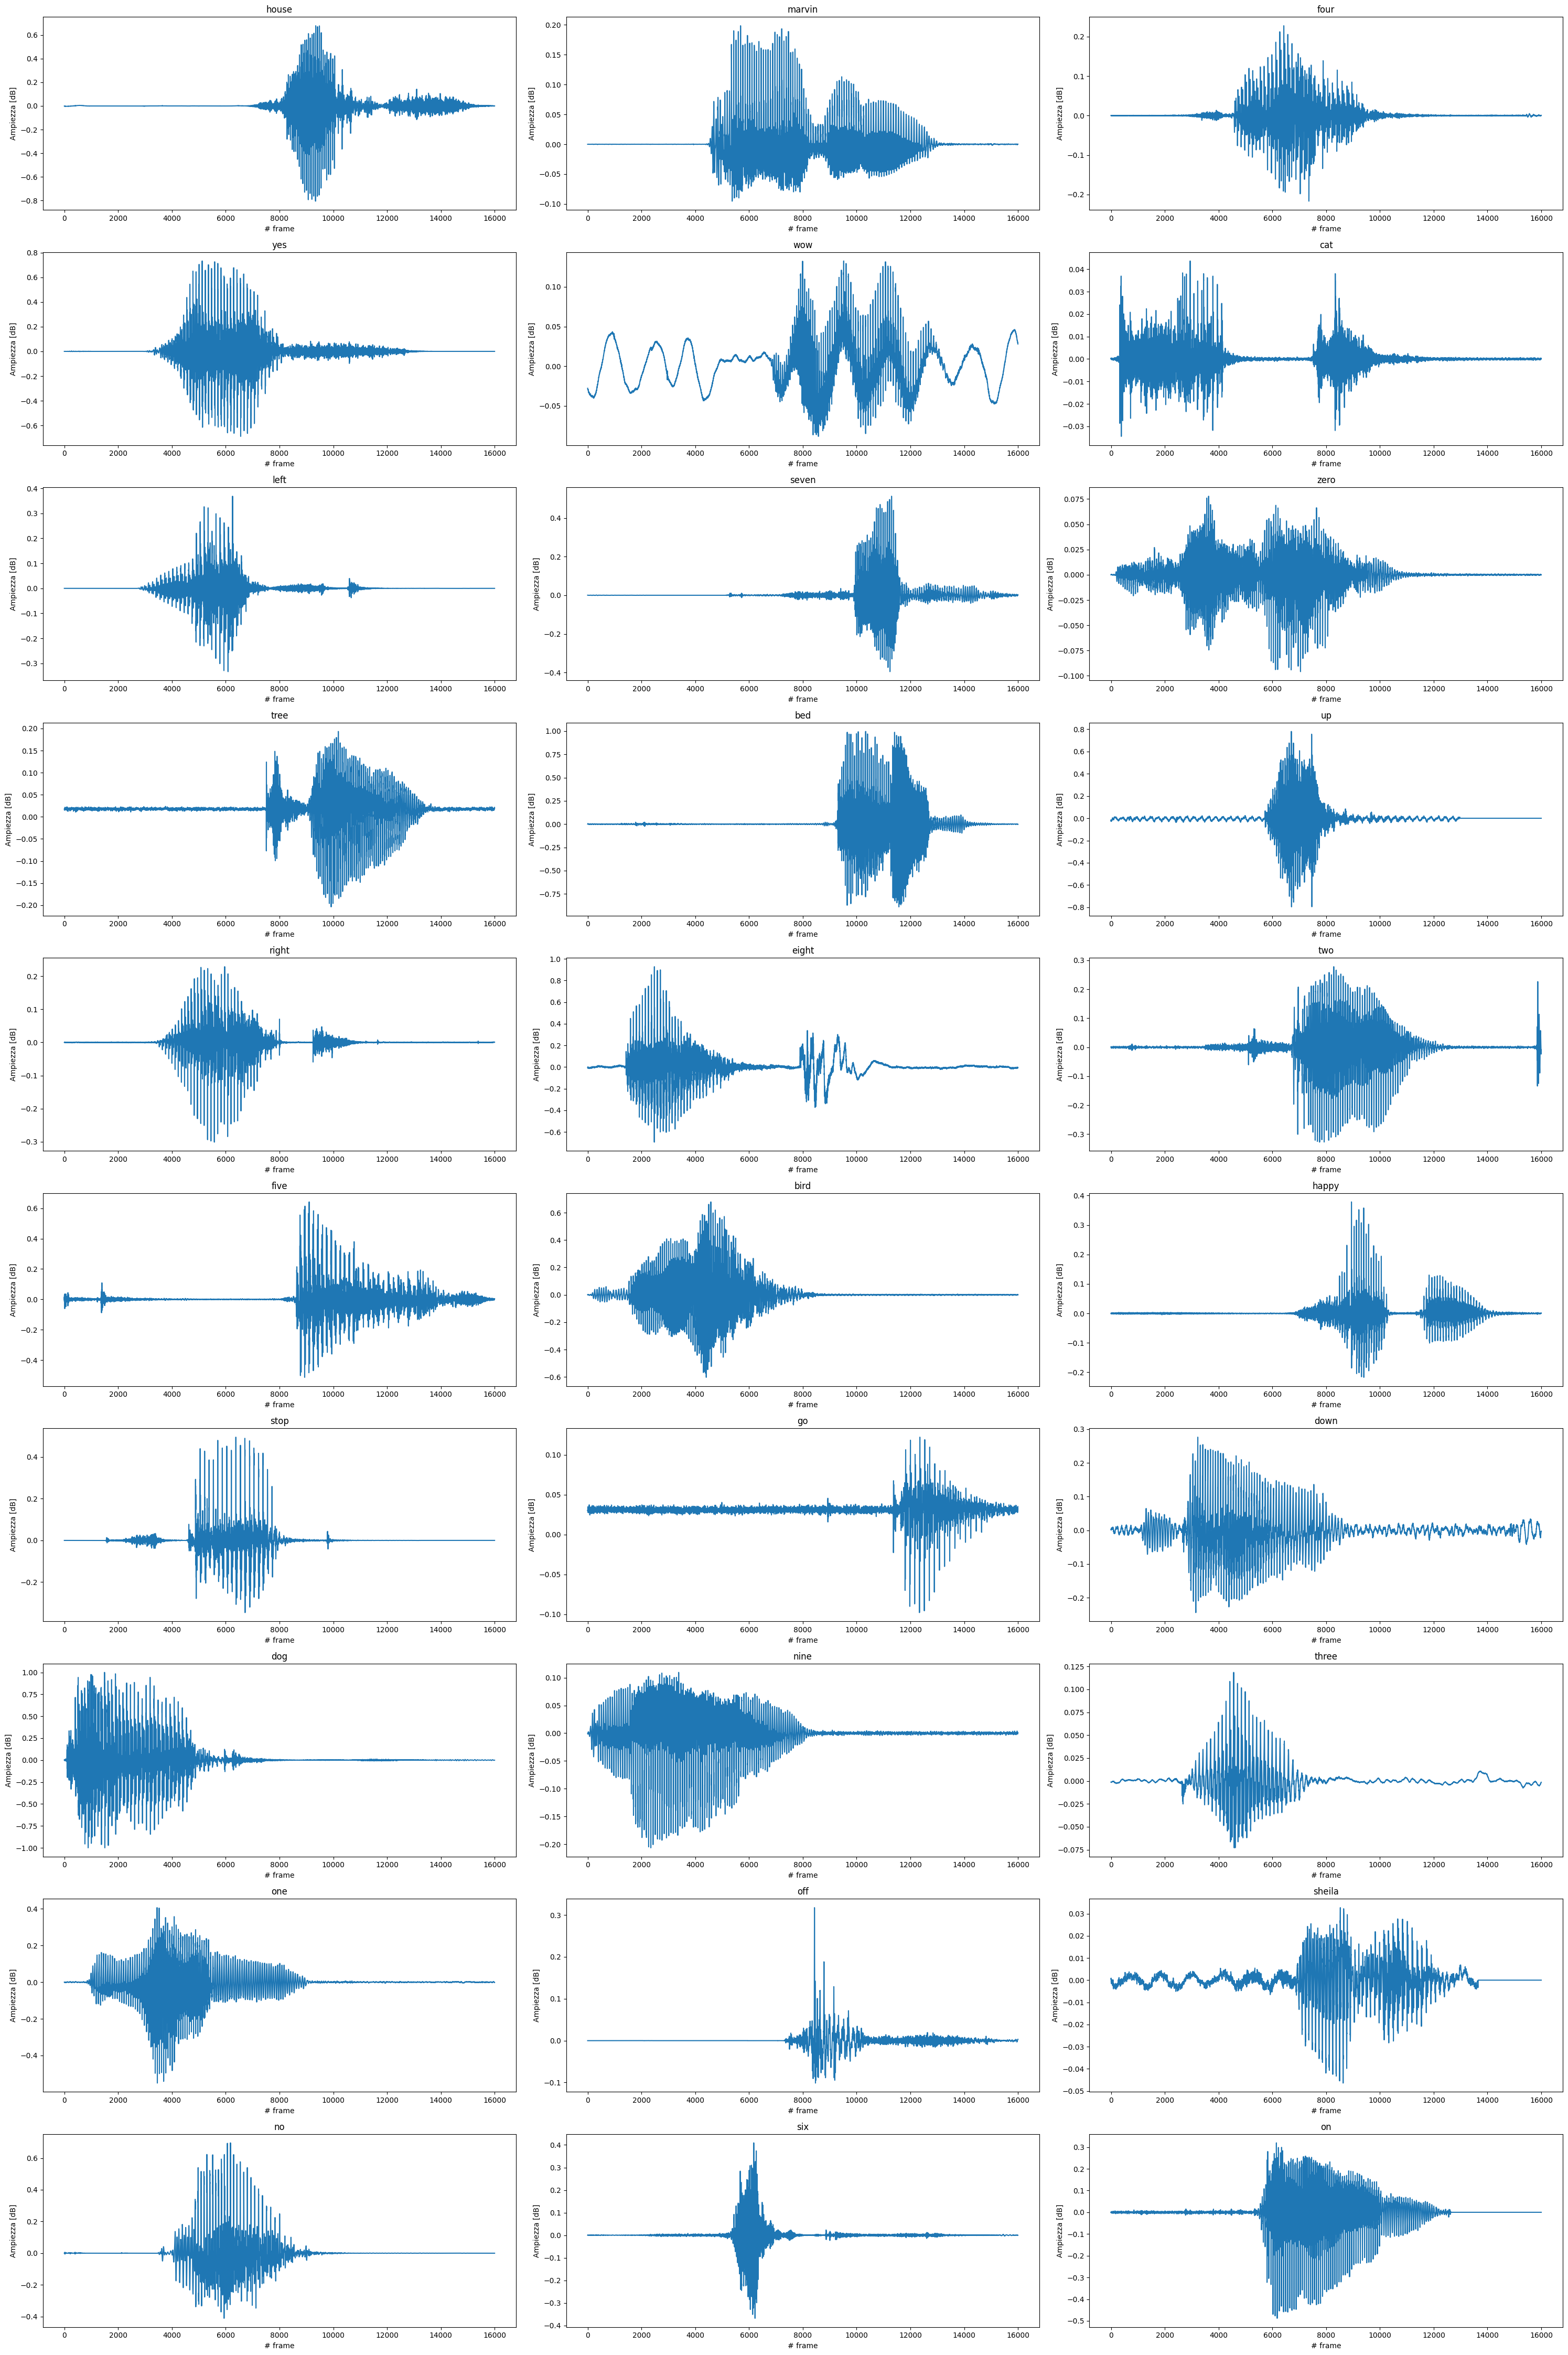

In [9]:
rows = 10
cols = 3

labels = list(audios.keys()) # mi salvo la lista delle label
fig, axes = plt.subplots(rows, cols, figsize=(30, 45))

# inserisco in ciascun subplot un audio
for index, audio in enumerate(audios.values()): 
    row = index // cols
    col = index % cols

    ax = axes[row][col]
    ax.set_ylabel('Ampiezza [dB]')
    ax.set_xlabel('# frame') 
    ax.set_title(labels[index])
    ax.plot(audio)

plt.tight_layout()
plt.show()